In [3]:
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from data335 import lm, stan_lm, bambi_lm, mad, plot_regression_line

In [152]:
df = pd.read_csv(
    "../data/earnings.csv", usecols=["weight", "height", "male", "ethnicity"]
).dropna()
df

,height,weight,male,ethnicity
0,74,210.0,1,White
1,66,125.0,0,White
2,64,126.0,0,White
3,65,200.0,0,White
4,63,110.0,0,Other
...,...,...,...,...
1811,61,120.0,0,White
1812,64,130.0,0,White
1813,72,194.0,1,White
1814,63,155.0,0,Other


In [153]:
ethnicities = pd.get_dummies(df["ethnicity"])
ethnicities

,Black,Hispanic,Other,White
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1811,False,False,False,True
1812,False,False,False,True
1813,False,False,False,True
1814,False,False,True,False


In [162]:
X = pd.concat([df[["height", "male"]], ethnicities], axis=1)
y = df["weight"]
X
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(-105.81367899329868,
 array([ 3.85213496, 12.1063201 ,  5.90126453, -0.25104753, -6.36009046,
         0.70987346]))

In [157]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other + White", data)
fit

/Users/mgreenbe/DATA335W2025/code/data335.py:113: RuntimeWarning: invalid value encountered in sqrt
  coef_se = se * np.sqrt(unscaled_coef_cov.diagonal())


,estimate,standard error,t-statistic,p-value
Intercept,4422.546875,NaN,NaN,NaN
height,20.263449,19.350139,1.047199,0.29515
male,-102.423275,152.586856,-0.671246,0.502151
Black,-3404.750000,NaN,NaN,NaN
Hispanic,-1145.609375,NaN,NaN,NaN
Other,-2942.593750,NaN,NaN,NaN
White,-3655.765625,NaN,NaN,NaN
sigma,2189.603175,,,


In [158]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ height + male + Black + Hispanic + Other", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,5.191391,2.267693,2.289283,0.022179
Hispanic,-0.960921,2.939356,-0.326915,0.74377
Other,-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


In [163]:
data = pd.concat([df[["weight", "height", "male"]], ethnicities], axis=1)
fit = lm("weight ~ 0 + height + male + Black + Hispanic + Other + White", data)
fit

,estimate,standard error,t-statistic,p-value
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
Black,-99.912414,16.44868,-6.07419,0.0
Hispanic,-106.064727,16.265595,-6.520802,0.0
Other,-112.173769,16.620302,-6.749201,0.0
White,-105.103806,16.3732,-6.419258,0.0
sigma,28.636333,,,


In [165]:
fit = lm("weight ~ height + male + C(ethnicity)", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
C(ethnicity)[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
C(ethnicity)[T.Other],-12.261355,5.184896,-2.364822,0.018145
C(ethnicity)[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [168]:
data = df.copy()
data["ethnicity"] = df["ethnicity"].astype("category")
fit = lm("weight ~ height + male + ethnicity", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
ethnicity[T.Other],-12.261355,5.184896,-2.364822,0.018145
ethnicity[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [173]:
data["ethnicity"] = data["ethnicity"].cat.reorder_categories(
    ["White", "Black", "Hispanic", "Other"]
)
data["ethnicity"].cat.categories

Index(['White', 'Black', 'Hispanic', 'Other'], dtype='object')

In [175]:
fit = lm("weight ~ height + male + ethnicity", data)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Black],5.191391,2.267693,2.289283,0.022179
ethnicity[T.Hispanic],-0.960921,2.939356,-0.326915,0.74377
ethnicity[T.Other],-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


### Residual plots

- Residuals:
  $$
  r_i = y_i - (\hat{\beta}_0x_0 + \hat{\beta}_1 x_1 + \cdots + \hat{\beta}_{n-1}x_{n-1})
  $$

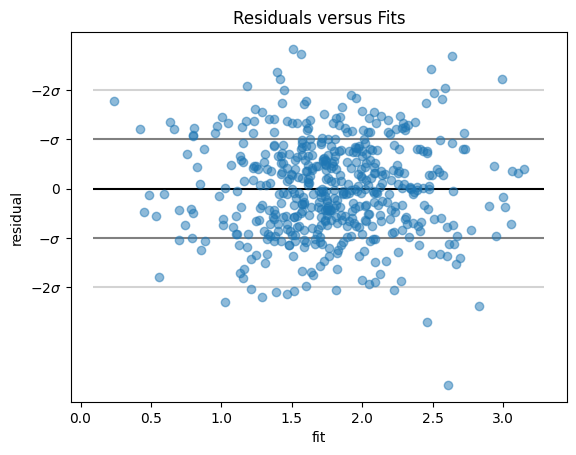

In [677]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

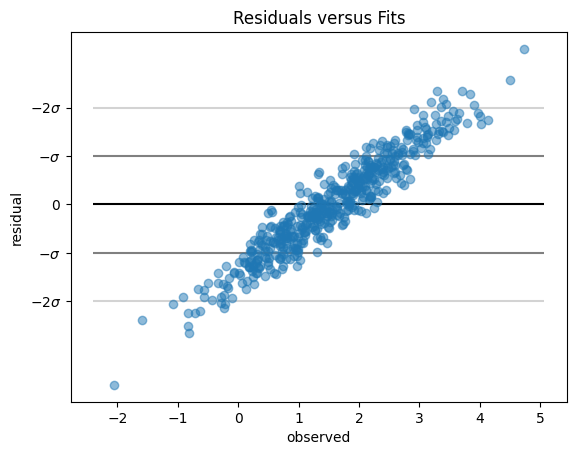

In [680]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
e = rng.normal(size=n)
y = X @ b + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("observed")
plt.ylabel("residual")
plt.show()

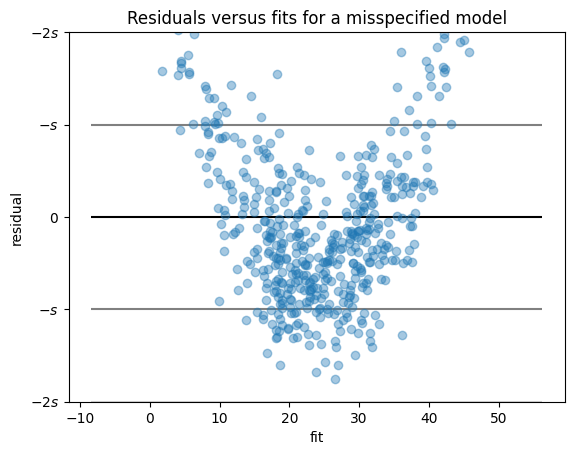

In [679]:
n = 500
p = 10
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
b = 2 * rng.uniform(size=p)
e = rng.normal(size=n)
y = (X @ b) ** 2 + e
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r = y - y_pred
s = r.std()

plt.plot(y_pred, r, "o", alpha=0.4)
plt.ylim(-3, 3)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus fits for a misspecified model")
plt.xlabel("fit")
plt.ylabel("residual")

plt.show()

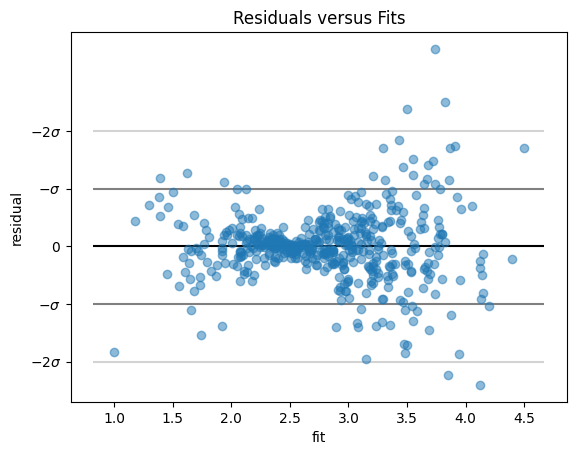

In [199]:
n = 500
p = 10
rng = np.random.default_rng()
X = rng.uniform(size=(n, p))
b = rng.uniform(size=p)
y = X @ b
y = y + (y - 2.5) * rng.normal(size=n)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(y_pred, y - y_pred, "o", alpha=0.5)
plt.hlines(
    [-2, -1, 0, 1, 2],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks(
    [-2, -1, 0, 1, 2], ["$-2\\sigma$", "$-\\sigma$", "$0$", "$-\\sigma$", "$-2\\sigma$"]
)
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

In [198]:
y.mean()

2.589869937769013

In [186]:
def make_data():
    n = 500
    np.random.seed(0)
    age = np.random.choice([0, 1, 2, 3], size=n)
    exercise = 2 * age + 3 * np.random.normal(size=n) + 6
    colesterol = 200 + 30 * age - 5 * exercise + 10 * np.random.normal(size=n)
    df = pd.DataFrame({"age": age, "exercise": exercise, "colesterol": colesterol})
    return df


data = make_data()
data.head()

,age,exercise,colesterol
0,0,7.569830,156.823822
1,3,11.485361,243.480692
2,1,10.315372,174.960647
3,0,8.470512,149.701074
4,3,18.489708,199.531134


<Axes: xlabel='exercise', ylabel='colesterol'>

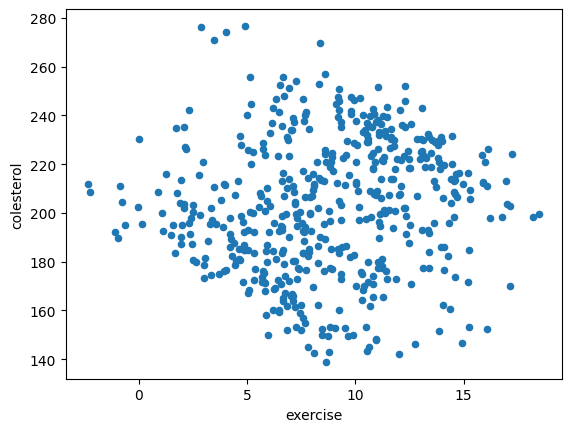

In [187]:
data.plot.scatter("exercise", "colesterol")

In [ ]:
fit = lm("colesterol ~ exercise", data)

,estimate,standard error,t-statistic,p-value
Intercept,197.127831,2.996137,65.793989,0.0
exercise,0.633311,0.313554,2.019784,0.043941
sigma,27.385991,,,


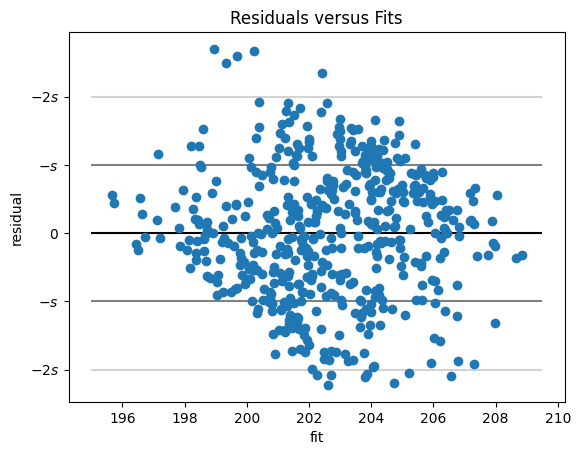

In [ ]:
s = fit.se
plt.scatter(y_pred, r)
plt.hlines(
    [-2 * s, -s, 0, s, 2 * s],
    *plt.xlim(),
    colors=["lightgrey", "grey", "black", "grey", "lightgrey"],
    zorder=-1
)
plt.yticks([-2 * s, -s, 0, s, 2 * s], ["$-2s$", "$-s$", "$0$", "$-s$", "$-2s$"])
plt.title("Residuals versus Fits")
plt.xlabel("fit")
plt.ylabel("residual")
plt.show()

x.min() = 0.00, x.max() = 20.03


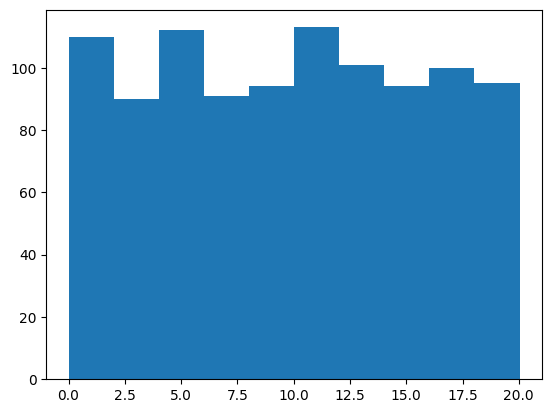

In [ ]:
rng = np.random.default_rng()
n = 1000

x = np.exp(3) * rng.uniform(size=n)
print(f"x.min() = {x.min():.2f}, x.max() = {x.max():.2f}")
plt.hist(x)
plt.show()

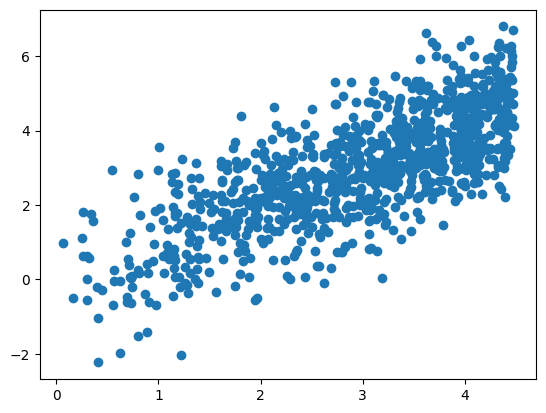

In [233]:
y = np.sqrt(x) + rng.normal(size=n)
plt.plot(np.sqrt(x), y, "o")

#### How does spending on food change as incomes rise?

- Hanna Ritchie, [Share of expenditure spent on food vs. total consumer
expenditure](https://ourworldindata.org/grapher/food-expenditure-share-gdp), Our World in Data, 2023.

In [698]:
data = (
    pd.read_csv(
        "../data/food-expenditure-vs-gdp.csv",
        usecols=[
            "Entity",
            "Year",
            "Total food expenditure",
            "Total consumer expenditure",
        ],
    )
    .rename(
        columns={
            "Total food expenditure": "Food",
            "Total consumer expenditure": "Consumer",
        }
    )
    .dropna()
)

for entity, group in data.groupby("Entity"):
    assert all(group["Year"].unique() == [2018, 2019, 2020, 2021, 2022])

data = data.groupby("Entity").agg("mean").round()
data.pop("Year")
data

,Food,Consumer
Entity,,
Algeria,596.0,1643.0
Angola,641.0,1333.0
Argentina,1531.0,6515.0
Australia,3004.0,31418.0
Austria,2550.0,25850.0
...,...,...
United States,2806.0,44283.0
Uruguay,1930.0,10766.0
Uzbekistan,357.0,949.0


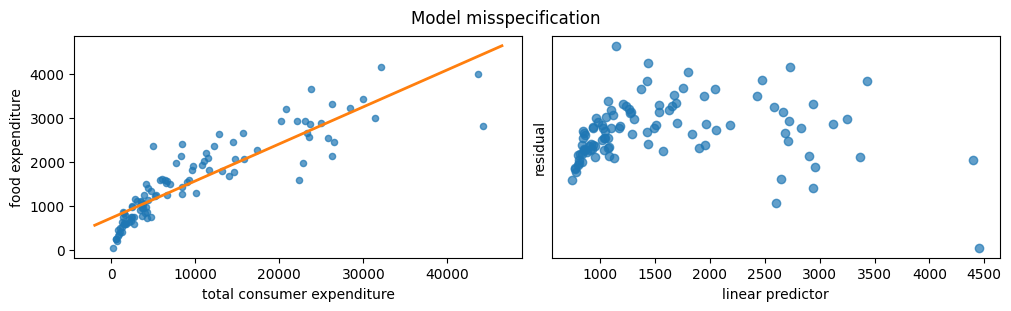

In [366]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), layout="constrained")

data.plot.scatter("Consumer", "Food", ax=ax0, alpha=0.7)
fit = lm("Food ~ Consumer", data)
plot_regression_line(fit.coef_est, ax=ax0, lw=2, color="C1")
food_pred = food_pred = fit.predict(data)
residuals = data["Food"] - food_pred

ax0.set_xlabel("total consumer expenditure")
ax0.set_ylabel("food expenditure")

ax1.scatter(food_pred, residuals, alpha=0.7)
ax1.set_yticks([])
ax1.set_ylabel("residual")
ax1.set_xlabel("linear predictor")

fig.suptitle("Model misspecification")
plt.show()

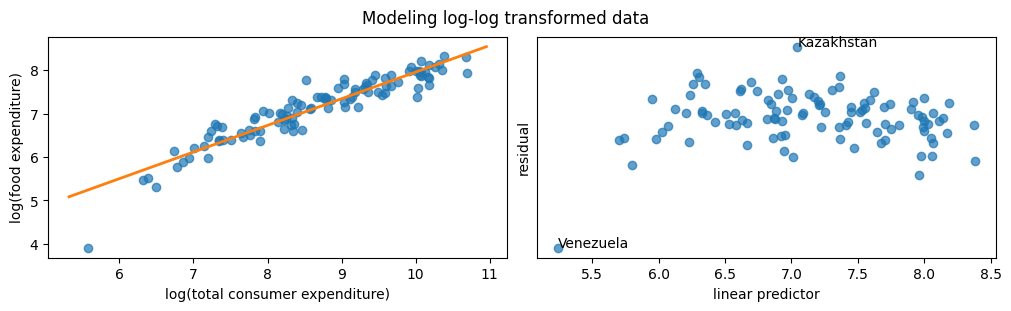

In [368]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), layout="constrained")

ax0.scatter(np.log(data["Consumer"]), np.log(data["Food"]), alpha=0.7)
fit = lm("log(Food) ~ log(Consumer)", data)
plot_regression_line(fit.coef_est, ax=ax0, lw=2, color="C1")
food_pred = food_pred = fit.predict(data)
residuals = np.log(data["Food"]) - food_pred

ax0.set_xlabel("log(total consumer expenditure)")
ax0.set_ylabel("log(food expenditure)")

ax1.scatter(food_pred, residuals, alpha=0.7)
ax1.set_yticks([])
ax1.set_ylabel("residual")
ax1.set_xlabel("linear predictor")

fig.suptitle("Modeling log-log transformed data")

i = residuals.argmin()
j = residuals.argmax()

ax1.annotate(text=data.index[i], xy=(food_pred[i], residuals.iloc[i]))
ax1.annotate(text=data.index[j], xy=(food_pred[j], residuals.iloc[j]))
plt.show()

- [Kazakhstanis Are Spending More Than a Half of Their Income on Food](https://kz.kursiv.media/en/2021-02-25/kazakhstanis-are-spending-more-half-their-income-food/)

- [Shortages in Venezuela](https://en.wikipedia.org/wiki/Shortages_in_Venezuela#cite_note-economist.com-7)

- [Engel's Law: Richer people spend more money on food, but it makes up a smaller share of their income](https://ourworldindata.org/engels-law-food-spending)

In [ ]:
df = (
    pd.read_csv("../data/ncbirths.csv")
    .drop(columns=["fage"])
    .dropna()
    .reset_index(drop=True)
)

assert np.allclose(df["weeks"], df["weeks"].round())
df["weeks"] = df["weeks"].astype(int)
assert np.allclose(df["visits"], df["visits"].round())
df["visits"] = df["visits"].astype(int)
assert np.allclose(df["gained"], df["gained"].round())
df["gained"] = df["gained"].astype(int)

for c in df.columns:
    if df[c].dtype == "object":
        assert len(df[c].unique()) == 2

df["mature"] = df["mature"] == "mature mom"
df["premie"] = df["premie"] == "premie"
df["married"] = df["marital"] == "married"
df["male"] = df["gender"] == "male"
df["smoker"] = df["habit"] == "smoker"
df["lowbirthweight"] = df["lowbirthweight"] == "low"
df["whitemom"] = df["whitemom"] == "white"

assert df[df["mature"]]["mage"].min() > df[~df["mature"]]["mage"].max()
assert df[df["premie"]]["weeks"].max() < df[~df["premie"]]["weeks"].max()
assert (
    df[df["lowbirthweight"]]["weight"].max() < df[~df["lowbirthweight"]]["weight"].max()
)

df = df.drop(
    columns=["marital", "gender", "habit", "mature", "premie", "lowbirthweight"]
)

df["whitemom"] = df["whitemom"].astype(int)
df["married"] = df["married"].astype(int)
df["male"] = df["male"].astype(int)
df["smoker"] = df["smoker"].astype(int)

df.to_csv("../data/ncbirths_preprocessed.csv", index=False)

df

,mage,weeks,visits,gained,weight,whitemom,married,male,smoker
0,13,39,10,38,7.63,0,0,1,0
1,14,42,15,20,7.88,0,0,1,0
2,15,37,11,38,6.63,1,0,0,0
3,15,41,6,34,8.00,1,0,1,0
4,15,39,9,27,6.38,0,0,0,0
...,...,...,...,...,...,...,...,...,...
957,42,40,10,26,8.44,0,1,1,0
958,42,38,18,20,6.19,1,1,0,0
959,45,40,15,32,6.94,1,1,0,0
960,46,31,8,25,4.56,0,1,0,0


In [ ]:
from data335 import compare_fits


mfull = lm(
    "weight ~ mage + weeks + visits + gained + whitemom + married + male + smoker", df
)
mred = lm("weight ~ mage + weeks + visits + gained + whitemom + married + male", df)

compare_fits(mfull, mred)

FitComparison(r2=0.013195350266252848, r2_adj=0.012159878440718974, ftest=FTestResult(df1=1, df2=953, stat=12.743321393076082, pval=0.0003751158942971733))

In [524]:
mfull

,estimate,standard error,t-statistic,p-value
Intercept,-6.371455,0.508634,-12.526589,0.0
mage,0.007149,0.006299,1.134982,0.256668
weeks,0.329306,0.012517,26.309284,0.0
visits,-0.004843,0.009249,-0.523618,0.600666
gained,0.009252,0.002465,3.7531,0.000185
whitemom,0.206161,0.082111,2.510761,0.012212
married,0.240029,0.084453,2.842169,0.004576
male,0.384233,0.069431,5.534059,0.0
smoker,-0.377704,0.105806,-3.569779,0.000375
sigma,1.073122,,,


In [ ]:
fit = bambi_lm(
    "weight ~ mage + weeks + visits + gained + whitemom + married + male + smoker", df
)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, mage, weeks, visits, gained, whitemom, married, male, smoker]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [534]:
fit

,median,mad_sd
sigma,1.074101,0.024297
Intercept,-6.379897,0.514236
mage,0.007111,0.006339
weeks,0.329412,0.012901
visits,-0.004924,0.009253
gained,0.009250,0.002398
whitemom,0.208217,0.081133
married,0.242288,0.086796
male,0.384509,0.070159
smoker,-0.376864,0.106790


In [541]:
np.mean(fit.draws["smoker"] < -0.3)

0.7665

Causal? No. Smoking moms drink more coffee on average, and maybe it's the extra caffeine affecting the baby's weight.

In [705]:
rng = np.random.default_rng(42)
n = 100
mean = np.zeros(n)
cov = 0.99 * np.ones((n, n))
I = np.arange(n)
cov[I, I] = 1

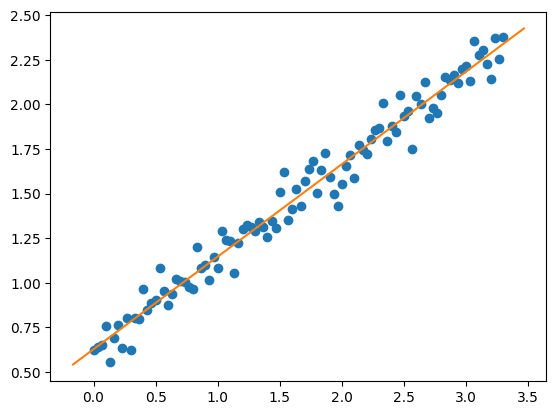

In [706]:
a = 1
b = 0.5
x = np.arange(n) / 30
X = x.reshape(-1, 1)


def make_data(rng=None):
    if rng is None:
        rng = np.random.default_rng()
    e = rng.multivariate_normal(mean=mean, cov=cov)
    y = a + b * x + e
    return y


y = make_data()
plt.plot(x, y, "o")

model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
slope = model.coef_[0]
plot_regression_line((intercept, slope))

In [707]:
df = pd.DataFrame({"x": x, "y": y})
fit = lm("y ~ x", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,0.627821,0.01659,37.843569,0.0
x,0.519014,0.008686,59.756128,0.0
sigma,0.083572,,,


In [708]:
r = 1000
coef_ests = np.zeros((r, 2))
coef_ses = np.zeros((r, 2))
sigmas = np.zeros(r)

for i in range(1000):
    df = pd.DataFrame({"x": x, "y": make_data()})
    fit = lm("y ~ x", df)
    sigmas[i] = fit.se
    coef_ests[i] = fit.coef_est
    coef_ses[i] = fit.coef_se


print(coef_ests.mean(axis=0))
print(coef_ests.std(axis=0))

[0.99323034 0.49968681]
[1.03886102 0.01026361]


In [709]:
df = pd.read_csv(
    "../data/earnings.csv", usecols=["weight", "height", "male", "ethnicity"]
).dropna()

fit = lm("weight ~ height + male + C(ethnicity)", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-99.912414,16.44868,-6.07419,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
C(ethnicity)[T.Hispanic],-6.152312,3.555277,-1.730473,0.083719
C(ethnicity)[T.Other],-12.261355,5.184896,-2.364822,0.018145
C(ethnicity)[T.White],-5.191391,2.267693,-2.289283,0.022179
sigma,28.636333,,,


In [676]:
0.05 / 3

0.016666666666666666

In [674]:
df["ethnicity"] = df["ethnicity"].astype("category")
df["ethnicity"] = df["ethnicity"].cat.reorder_categories(
    ["White", "Black", "Hispanic", "Other"]
)

fit = lm("weight ~ height + male + ethnicity", df)
fit

,estimate,standard error,t-statistic,p-value
Intercept,-105.103806,16.3732,-6.419258,0.0
height,3.852135,0.253067,15.221779,0.0
male,12.106320,1.99558,6.066567,0.0
ethnicity[T.Black],5.191391,2.267693,2.289283,0.022179
ethnicity[T.Hispanic],-0.960921,2.939356,-0.326915,0.74377
ethnicity[T.Other],-7.069964,4.784855,-1.477571,0.139699
sigma,28.636333,,,


In [671]:
fit_red = lm("weight ~ height + male", df)
fit_red

,estimate,standard error,t-statistic,p-value
Intercept,-107.065451,16.197346,-6.610061,0.0
height,3.887891,0.250869,15.497673,0.0
male,11.837092,1.985109,5.962944,0.0
sigma,28.676477,,,


In [35]:
def make_data_maker(a, b, x, sigma=1.0, rng=None):
    if rng is None:
        rng = np.random.default_rng()

    def make_data():
        y = a + b * x + sigma * rng.uniform(size=len(x))
        return y

    return make_data

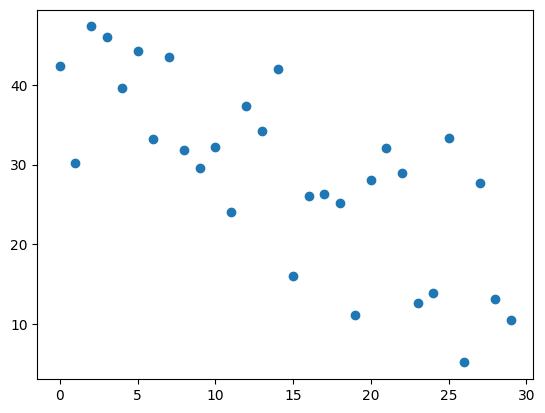

In [37]:
n = 30
x = np.arange(n)
a = n
b = -1
make_data = make_data_maker(a, b, x, n)
y = make_data()
plt.scatter(x, y)

In [42]:
r = 1000
coef_ests = np.zeros((r, 2))
coef_ses = np.zeros((r, 2))
for i in range(r):
    y = make_data()
    fit = lm("y ~ x", {"y": y, "x": x})
    coef_ests[i] = fit.coef_est
    coef_ses[i] = fit.coef_se

#### Linear Regression Cast of Characters
##### design matrix, predictor matrix, feature matrix, data matrix
- $X$, shape $(n, p)$

##### response vector, target vector
- $y$, shape $(n,)$

##### regression coefficient vector
- $\beta$, shape $(p,)$

##### multivariate linear regression model
- $y = X\beta + \epsilon$ 

##### residual vector associated to an estimate $b$ of $\beta$
- $r(b) = y - Xb$

##### least squares coefficient estimate
- $\hat{\beta}$, shape $(p,)$
- minimizer of the residual norm:
  $$\hat{\beta}=\argmin_b \|r(b)\|$$
- From linear algebra:
  $$
  \hat\beta = (X^TX)^{-1}X^Ty
  $$

### Properties of $\hat\beta$

#### Unbiasdness

- If $\mathbb{E}[\epsilon]=0$, then $\hat{\beta}$ is an unbiased estimator of $\beta$, i.e., $\mathbb{E}[\hat\beta] = \beta$.

  ***Proof:***

  By definition of $\hat\beta$ and the rules of matrix arithmetic:
  $$
  \begin{aligned}
  \hat\beta &= (X^TX)^{-1}X^Ty\\
  &= (X^TX)^{-1}X^T(X\beta + \epsilon)\\
  &= (X^TX)^{-1}X^TX\beta + (X^TX)^{-1}X^T\epsilon\\
  &= \beta + (X^TX)^{-1}X^T\epsilon\\
  \end{aligned}
  $$

  By the linearity of expectation and the assumption that $\mathbb{E}[\epsilon]=0$:
  $$
  \begin{aligned}
  \mathbb{E}[\hat\beta] &= \mathbb{E}[\beta + (X^TX)^{-1}X^T\epsilon]\\
  &=\beta + (X^TX)^{-1}X^T\mathbb{E}[\epsilon]\\
  &=\beta
  \end{aligned}
  $$

  ***Example:*** If the $\epsilon_i$ are independent and $N(0, 1)$-distributed, then $\mathbb{E}[\hat\beta] = \beta$.

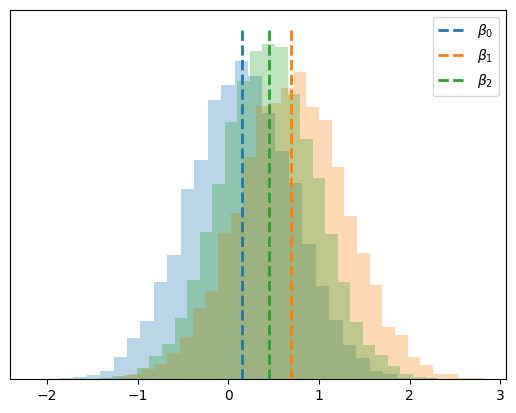

In [108]:
n = 30
p = 3
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
beta = rng.uniform(size=p)


def make_y():
    epsilon = rng.normal(size=n)
    y = X @ beta + epsilon
    return y


r = 10000
beta_hats = np.zeros((r, p))

U = np.linalg.inv(X.T @ X) @ X.T
for i in range(r):
    y = make_y()
    beta_hats[i] = U @ y

expected_beta_hat = beta + 0.5 * U @ np.ones(n)

for i in range(3):
    plt.hist(beta_hats[:, i], bins=30, density=True, alpha=0.3)

ylim = plt.ylim()
for i in range(3):
    plt.plot([beta[i], beta[i]], ylim, "--", color=f"C{i}", lw=2, label=f"$\\beta_{i}$")
    plt.yticks([])
    plt.legend()


plt.show()

***Example:*** If the $\epsilon_i$ are independent and $\operatorname{Uniform}[0,1]$-distributed, then $\mathbb{E}[\epsilon] = \tfrac12\mathbf{1}$ and
  $$
  \mathbb{E}[\hat\beta] = \beta + \underbrace{\tfrac12(X^TX)^{-1}X^T\mathbf{1}}_{\text{bias}}.
  $$

bias = [0.37 0.26 0.28]


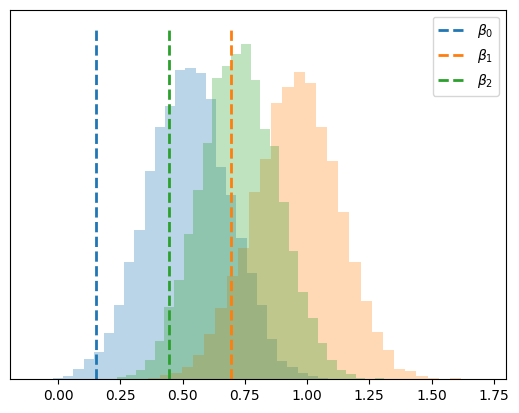

In [110]:
n = 30
p = 3
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
beta = rng.uniform(size=p)


def make_y():
    epsilon = rng.uniform(size=n)
    y = X @ beta + epsilon
    return y


r = 10000
beta_hats = np.zeros((r, p))

U = np.linalg.inv(X.T @ X) @ X.T
for i in range(r):
    y = make_y()
    beta_hats[i] = U @ y

print(f"bias = {(0.5 * U @ np.ones(n)).round(2)}")

for i in range(3):
    plt.hist(beta_hats[:, i], bins=30, density=True, alpha=0.3)

ylim = plt.ylim()
for i in range(3):
    plt.plot([beta[i], beta[i]], ylim, "--", color=f"C{i}", lw=2, label=f"$\\beta_{i}$")
    plt.yticks([])
    plt.legend()


plt.show()

$$
X^TWX\beta = X^TW y
$$

$$
\tilde{\beta} = (X^TWX)^{-1}X^TWy
$$

Let $W$ be any invertible matrix with shape $(n, n)$.

By definition of $\tilde\beta$ and the rules of matrix arithmetic:
  $$
  \begin{aligned}
  \tilde\beta &= (X^TWX)^{-1}X^TWy\\
  &= (X^TWX)^{-1}X^TW(X\beta + \epsilon)\\
  &= (X^TWX)^{-1}X^TWX\beta + (X^TWX)^{-1}X^TW\epsilon\\
  &= \beta + (X^TWX)^{-1}X^TW\epsilon\\
  \end{aligned}
  $$


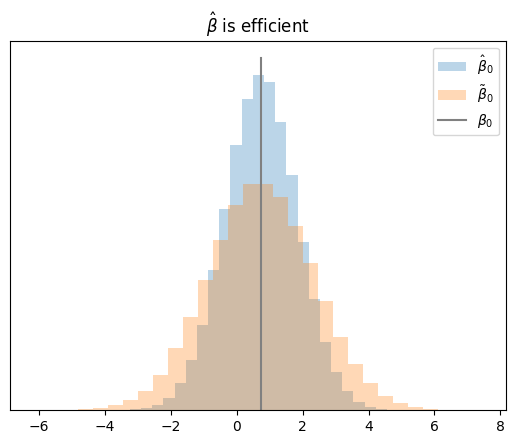

In [179]:
n = 10
p = 3
rng = np.random.default_rng(42)
X = rng.uniform(size=(n, p))
beta = rng.uniform(size=p)


def make_y():
    epsilon = rng.normal(size=n)
    y = X @ beta + epsilon
    return y


r = 100000
beta_hats = np.zeros((r, p))
beta_tildes = np.zeros((r, p))

U = np.linalg.inv(X.T @ X) @ X.T
W = np.diag(np.logspace(-4, 5, n))
# W = rng.uniform(size=(n, n))
V = np.linalg.inv(X.T @ W @ X) @ (X.T @ W)

for i in range(r):
    y = make_y()
    beta_hats[i] = U @ y
    beta_tildes[i] = V @ y

for i in range(1):
    plt.hist(
        beta_hats[:, i], bins=30, density=True, alpha=0.3, label="$\\hat{\\beta}_0$"
    )
    plt.hist(
        beta_tildes[:, i], bins=30, density=True, alpha=0.3, label="$\\tilde{\\beta}_0$"
    )
    plt.yticks([])

plt.plot([beta[0], beta[0]], plt.ylim(), color="grey", label="$\\beta_0$")
plt.title("$\\hat{\\beta}$ is efficient")
plt.legend()
plt.show()

#### Gauss-Markov theorem

- An estimator of $\beta$ of the form $Ay$ is called a **linear estimator**.

- Let
  $$\mathcal{U}=\{A : AX\beta = \beta\}.$$

- If $\mathbb{E}[\epsilon]=0$, then
  $$
  \begin{aligned}
  \mathbb{E}[Ay]&=\mathbb{E}[A(X\beta + \epsilon)]\\
  &=AX\beta + A\mathbb{E}[\epsilon]\\
  &= AX\beta.
  \end{aligned}
  $$

- Thus, if $\mathbb{E}[\epsilon]=0$, then
  $$\mathbb{E}[Ay]=\beta \Longleftrightarrow A\in\mathcal{U}.$$

- In other words, the linear, unbiased estimators of $\beta$ are those of the form $Ay$ for $A\in\mathcal{U}$.

##### Theorem
Suppose the errors $\epsilon_i$ are IID with mean $0$. Then
$$
\mathbb{V}[\hat{\beta}] \leq \mathbb{V}[Ay]
$$
for all $A\in\mathcal{U}$.

Thus, $\hat{\beta}$ is the **best, linear, unbiased estimator (BLUE)** of $\beta$, where *best* means *minimal variance*.

In [248]:
df = pd.read_csv("../data/auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


You're studying whether extra study sessions help students prepare for a standardized test (e.g. SAT).



In [187]:
mu = 10
sigma = 4

In [240]:
rng = np.random.default_rng(42)
mu_class_size = 20
sigma_class_size = 8
num_classes = 10
class_sizes = rng.uniform(1, 25, size=num_classes).astype(int)
class_hours = rng.uniform(0, 10, size=num_classes).astype(int)

class_ = []
effect = []
hours = []
for i, n in enumerate(class_sizes):
    class_.extend([i for _ in range(n)])
    hours.extend([class_hours[i] for _ in range(n)])
    effect.extend(rng.normal(2 * class_hours[i], 6, size=n).round())

In [241]:
df = pd.DataFrame({"class": class_, "hours": hours, "effect": effect})

<Axes: title={'center': 'effect'}, xlabel='class'>

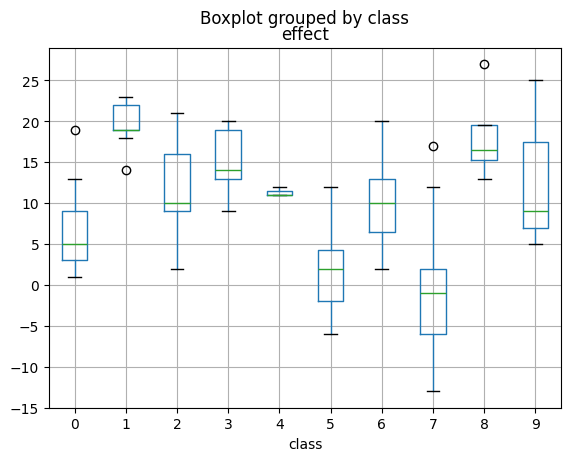

In [242]:
df.boxplot(column="effect", by="class")

<Axes: xlabel='hours', ylabel='effect'>

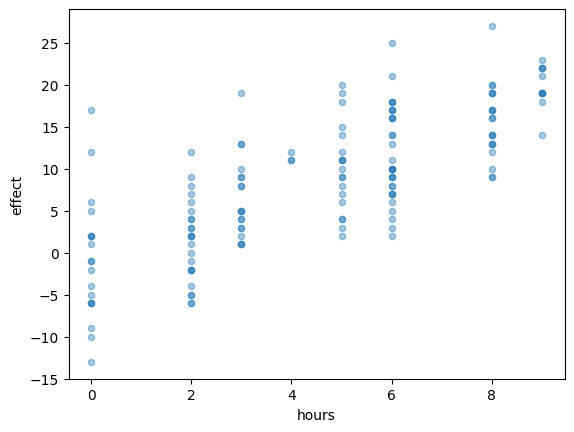

In [243]:
df.plot.scatter("hours", "effect", alpha=0.4)

In [244]:
grouped = df.groupby("class").agg({"hours": "mean", "effect": ["mean", "std"]})
grouped

hours     effect          
       mean       mean       std
class                           
0       3.0   6.473684  4.857622
1       9.0  19.818182  2.561959
2       6.0  11.476190  5.173191
3       8.0  15.000000  3.741657
4       4.0  11.333333  0.577350
5       2.0   1.458333  4.942972
6       5.0  10.157895  5.315210
7       0.0  -0.842105  7.448066
8       8.0  18.250000  6.075909
9       6.0  12.181818  6.554665

In [245]:
grouped["class_size"] = class_sizes
grouped

hours     effect           class_size
       mean       mean       std           
class                                      
0       3.0   6.473684  4.857622         19
1       9.0  19.818182  2.561959         11
2       6.0  11.476190  5.173191         21
3       8.0  15.000000  3.741657         17
4       4.0  11.333333  0.577350          3
5       2.0   1.458333  4.942972         24
6       5.0  10.157895  5.315210         19
7       0.0  -0.842105  7.448066         19
8       8.0  18.250000  6.075909          4
9       6.0  12.181818  6.554665         11

In [424]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

auto = pd.read_csv(
    "../data/auto.csv",
    na_values=["?"],
    usecols=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
    ],
).dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


In [284]:
def train_test_split(random_state=None):
    X_train = auto.sample(frac=1, replace=True, random_state=random_state)
    X_test = auto.iloc[~auto.index.isin(X_train.index)]
    y_train = X_train.pop("mpg")
    y_test = X_test.pop("mpg")
    return X_train, X_test, y_train, y_test


model = LinearRegression()

In [288]:
r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    X_train, X_test, y_train, y_test = train_test_split()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mses_train[i] = mean_squared_error(y_train, y_train_pred)
    maes_train[i] = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mses_test[i] = mean_squared_error(y_test, y_test_pred)
    maes_test[i] = mean_absolute_error(y_test, y_test_pred)

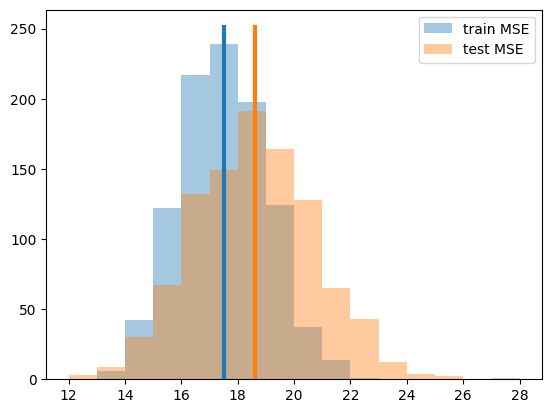

In [ ]:
bins = np.arange(12, 29)
plt.hist(mses_train, alpha=0.4, label="train MSE", bins=bins)
plt.hist(mses_test, alpha=0.4, label="test MSE", bins=bins)

ylim = plt.ylim()
plt.plot([mses_train.mean(), mses_train.mean()], ylim, "C0", lw=3)
plt.plot([mses_test.mean(), mses_test.mean()], ylim, "C1", lw=3)

plt.legend()

In [298]:
mses_train.mean(), mses_test.mean(), mses_train.std(), mses_test.std()

(17.503902190219407, 18.595156624844794, 1.5341952901670217, 2.144944334947583)

In [434]:
auto["hp_squared"] = auto["horsepower"] ** 2

In [435]:
r = 1000
mses_train = np.zeros(r)
maes_train = np.zeros(r)

mses_test = np.zeros(r)
maes_test = np.zeros(r)

for i in range(r):
    X_train, X_test, y_train, y_test = train_test_split()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mses_train[i] = mean_squared_error(y_train, y_train_pred)
    maes_train[i] = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mses_test[i] = mean_squared_error(y_test, y_test_pred)
    maes_test[i] = mean_absolute_error(y_test, y_test_pred)

In [436]:
mses_train.mean(), mses_test.mean(), mses_train.std(), mses_test.std()

(14.757856483722586,
 15.955733874386407,
 1.3836055501961617,
 1.9840935924594134)

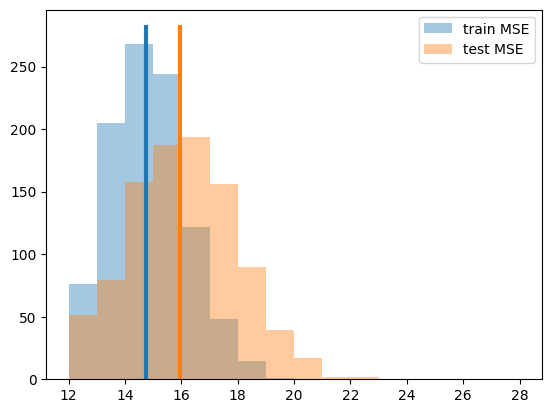

In [437]:
bins = np.arange(12, 29)
plt.hist(mses_train, alpha=0.4, label="train MSE", bins=bins)
plt.hist(mses_test, alpha=0.4, label="test MSE", bins=bins)

ylim = plt.ylim()
plt.plot([mses_train.mean(), mses_train.mean()], ylim, "C0", lw=3)
plt.plot([mses_test.mean(), mses_test.mean()], ylim, "C1", lw=3)

plt.legend()

In [177]:
auto = pd.read_csv(
    "../data/auto.csv", na_values=["?"], dtype={"origin": "category"}
).dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [180]:
f1 = lm("mpg ~ origin", auto)

,count,mean
origin,,
1,245,20.033469
2,68,27.602941
3,79,30.450633


In [178]:
f2 = lm("mpg ~ 0 + origin", auto)

In [183]:
print(f1.predict(auto)[:5])
print(f2.predict(auto)[:5])

[20.03346939 20.03346939 20.03346939 20.03346939 20.03346939]
[20.03346939 20.03346939 20.03346939 20.03346939 20.03346939]


In [219]:
mpg = auto.groupby("origin", observed=True)["mpg"].agg(["count", "mean"])
display(mpg)
mu = mpg["mean"].mean()
alpha = mpg["mean"] - mu
display(alpha)

,count,mean
origin,,
1,245,20.033469
2,68,27.602941
3,79,30.450633


origin
1   -5.995545
2    1.573927
3    4.421618
Name: mean, dtype: float64

In [231]:
X.t

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [229]:
X = pd.get_dummies(auto["origin"])
u = np.array(X @ alpha + mu, dtype=float)
v = f1.predict(auto)
np.allclose(u, v)

True

In [227]:
u

array([20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 30.450632911392404,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       30.450632911392404, 27.602941176470587, 27.602941176470587,
       27.602941176470587, 27.602941176470587, 27.602941176470587,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 30.450632911392404,
       20.0334693877551, 30.450632911392404, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
       20.0334693877551, 20.0334693877551, 20.0334693877551,
      

In [225]:
v

array([20.03346939, 20.03346939, 20.03346939, 20.03346939, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 30.45063291,
       20.03346939, 20.03346939, 20.03346939, 30.45063291, 27.60294118,
       27.60294118, 27.60294118, 27.60294118, 27.60294118, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 30.45063291,
       20.03346939, 30.45063291, 20.03346939, 20.03346939, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 27.60294118,
       27.60294118, 27.60294118, 30.45063291, 30.45063291, 27.60294118,
       20.03346939, 30.45063291, 20.03346939, 27.60294118, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 20.03346939,
       20.03346939, 20.03346939, 20.03346939, 20.03346939, 20.03

In [215]:
np.unique(f1.predict(auto))

array([20.03346939, 27.60294118, 30.45063291])

In [204]:
auto.iloc[78]

mpg                        26.0
cylinders                     4
displacement               96.0
horsepower                 69.0
weight                     2189
acceleration               18.0
year                         72
origin                        2
name            renault 12 (sw)
Name: 79, dtype: object

In [160]:
wage = pd.read_csv("../data/wage_preprocessed.csv")
for c in wage.columns:
    if wage[c].dtype == "object":
        wage[c] = wage[c].astype("category")

wage["healthins"] = (wage["health_ins"] == "Yes").astype(int)
wage["infojob"] = (wage["jobclass"] == "Information").astype(int)
wage["healthy"] = (wage["health"] == ">=Very Good").astype(int)
eds = {
    "< HS Grad": 0,
    "Advanced Degree": 4,
    "College Grad": 3,
    "HS Grad": 1,
    "Some College": 2,
}
wage["marital"] = wage["marital"].cat.rename_categories({"Never Married": "Never"})
wage["marital"] = wage["marital"].cat.rename_categories(lambda x: x.lower())
wage["race"] = wage["race"].cat.rename_categories(lambda x: x.lower())
wage["education"] = wage["education"].apply(lambda x: eds[x])
wage = wage.drop(columns=["jobclass", "health", "logwage"])
wage = wage[
    ["wage", "year", "age", "education", "healthy", "healthins", "marital", "race"]
]
display(wage.head())
display(wage.info())

,wage,year,age,education,healthy,healthins,marital,race
0,75.043154,2006,18,0,0,0,never,white
1,70.476020,2004,24,3,1,0,never,white
2,130.982177,2003,45,2,0,1,married,white
3,154.685293,2003,43,3,1,1,married,asian
4,75.043154,2005,50,1,0,1,divorced,white


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   wage       3000 non-null   float64 
 1   year       3000 non-null   int64   
 2   age        3000 non-null   int64   
 3   education  3000 non-null   category
 4   healthy    3000 non-null   int64   
 5   healthins  3000 non-null   int64   
 6   marital    3000 non-null   category
 7   race       3000 non-null   category
dtypes: category(3), float64(1), int64(4)
memory usage: 126.7 KB


None

In [236]:
wage.to_csv("../data/wage_preprocessed.csv", index=False)

In [237]:
wage = pd.read_csv("../data/wage_preprocessed.csv")
wage

,wage,year,age,education,healthy,healthins,marital,race
0,75.043154,2006,18,0,0,0,never,white
1,70.476020,2004,24,3,1,0,never,white
2,130.982177,2003,45,2,0,1,married,white
3,154.685293,2003,43,3,1,1,married,asian
4,75.043154,2005,50,1,0,1,divorced,white
...,...,...,...,...,...,...,...,...
2995,154.685293,2008,44,2,1,1,married,white
2996,99.689464,2007,30,1,1,0,married,white
2997,66.229408,2005,27,0,0,0,married,black
2998,87.981033,2005,27,2,1,1,never,white


In [238]:
wage["year"].unique()

array([2006, 2004, 2003, 2005, 2008, 2009, 2007])

In [94]:
race = wage.groupby("race", observed=True)["wage"].agg(["count", "mean", "std"])
race

,count,mean,std
race,,,
Asian,190,120.288288,46.422514
Black,293,101.601177,37.162486
Other,37,89.973326,29.153530
White,2480,112.563666,41.733830


In [166]:
base = lm("wage ~ year + age + education + healthy + healthins", wage)

In [ ]:
marital = lm("wage ~ year + age + education + healthy + healthins + marital", wage)
marital

,estimate,standard error,t-statistic,p-value
Intercept,-2433.501097,619.70519,-3.926869,0.000088
year,1.236164,0.309044,3.999962,0.000065
age,0.292665,0.062111,4.711994,0.000003
education,13.816353,0.535914,25.780923,0.0
healthy,6.726584,1.428447,4.70902,0.000003
healthins,17.474060,1.402252,12.461425,0.0
marital[T.married],13.573892,2.521461,5.383344,0.0
marital[T.never],-4.241856,2.897407,-1.464018,0.143294
marital[T.separated],8.210111,5.213807,1.574687,0.115435
marital[T.widowed],-3.103330,8.211948,-0.377904,0.705529


In [168]:
race = lm("wage ~ year + age + education + healthy + healthins + race", wage)
race

,estimate,standard error,t-statistic,p-value
Intercept,-2314.402700,631.422479,-3.665379,0.000251
year,1.175268,0.314806,3.733309,0.000193
age,0.541724,0.056662,9.560588,0.0
education,13.885614,0.551952,25.157275,0.0
healthy,7.921659,1.451815,5.456383,0.0
healthins,17.666964,1.430065,12.353958,0.0
race[T.black],-6.420605,3.289337,-1.951945,0.051038
race[T.other],-4.904189,6.314849,-0.776612,0.437449
race[T.white],0.777538,2.653075,0.29307,0.769489
sigma,34.873356,,,


In [170]:
marital_race = lm(
    "wage ~ year + age + education + healthy + healthins + marital + race", wage
)
marital_race

,estimate,standard error,t-statistic,p-value
Intercept,-2472.241036,619.934719,-3.987905,0.000068
year,1.254780,0.309116,4.059248,0.00005
age,0.300484,0.062325,4.82122,0.000001
education,13.768714,0.542907,25.361079,0.0
healthy,6.671211,1.428526,4.669996,0.000003
healthins,17.409772,1.40325,12.406753,0.0
marital[T.married],13.562832,2.525585,5.370174,0.0
marital[T.never],-3.839450,2.903073,-1.322547,0.186087
marital[T.separated],8.669308,5.218494,1.661266,0.096765
marital[T.widowed],-2.294087,8.219786,-0.279093,0.780193


In [172]:
compare_fits(marital, base)

FitComparison(r2=0.04141097622601131, r2_adj=0.040128582883169894, ftest=FTestResult(df1=4, df2=2990, stat=32.29194572568128, pval=1.1102230246251565e-16))

In [174]:
compare_fits(race, base)

FitComparison(r2=0.003928107465491215, r2_adj=0.002929038365657277, ftest=FTestResult(df1=3, df2=2991, stat=3.9317675485547854, pval=0.008198557198186185))

In [175]:
compare_fits(marital_race, marital)

FitComparison(r2=0.001811145158132521, r2_adj=0.0008086119929080482, ftest=FTestResult(df1=3, df2=2987, stat=1.8065688208198902, pval=0.14376843356247104))

In [176]:
compare_fits(marital_race, race)

FitComparison(r2=0.03937367666281033, r2_adj=0.03808726712369137, ftest=FTestResult(df1=4, df2=2987, stat=30.607419694487273, pval=1.1102230246251565e-16))

In [93]:
marital = wage.groupby("marital", observed=True)["wage"].agg(["count", "mean", "std"])
marital

,count,mean,std
marital,,,
Divorced,204,103.159261,33.800978
Married,2074,118.860261,43.120554
Never Married,648,92.734649,32.920068
Separated,55,101.215787,33.663381
Widowed,19,99.538655,23.741055


In [105]:
lm("wage ~ marital", wage)

,estimate,standard error,t-statistic,p-value
Intercept,103.159261,2.820053,36.580605,0.0
marital[T.Married],15.701000,2.955492,5.312482,0.0
marital[T.Never Married],-10.424612,3.233625,-3.223816,0.001279
marital[T.Separated],-1.943474,6.11964,-0.31758,0.750826
marital[T.Widowed],-3.620606,9.661242,-0.374756,0.707869
sigma,40.278419,,,


In [106]:
lm("wage ~ age + marital", wage)

,estimate,standard error,t-statistic,p-value
Intercept,82.586844,4.393189,18.798838,0.0
age,0.432122,0.071051,6.081875,0.0
marital[T.Married],16.887704,2.944366,5.7356,0.0
marital[T.Never Married],-3.932185,3.386996,-1.160965,0.245749
marital[T.Separated],-0.305876,6.089156,-0.050233,0.95994
marital[T.Widowed],-4.995460,9.606373,-0.520015,0.603091
sigma,40.038577,,,


In [126]:
fit_reduced = lm("wage ~ age + race + marriage", wage)
fit_reduced

,estimate,standard error,t-statistic,p-value
Intercept,86.305812,3.948001,21.860633,0.0
age,0.468230,0.067451,6.941812,0.0
race[T.Black],-15.986554,3.743409,-4.270587,0.00002
race[T.Other],-24.760057,7.191048,-3.443178,0.000583
race[T.White],-6.736926,3.011737,-2.23689,0.025367
marriage,18.119956,1.731764,10.463294,0.0
sigma,39.967411,,,


In [127]:
fit_full = lm("wage ~ age + race + marriage + race:marriage", wage)
fit_full

,estimate,standard error,t-statistic,p-value
Intercept,93.280829,6.763819,13.791147,0.0
age,0.471345,0.06745,6.98811,0.0
race[T.Black],-18.437799,7.396213,-2.49287,0.012725
race[T.Other],-27.389790,12.137963,-2.256539,0.024109
race[T.White],-15.125320,6.582306,-2.297876,0.021638
marriage,9.179524,7.218876,1.2716,0.203614
race[T.Black]:marriage,1.183471,8.615874,0.137359,0.890756
race[T.Other]:marriage,1.434933,15.18238,0.094513,0.924708
race[T.White]:marriage,10.706782,7.400501,1.446764,0.148068
sigma,39.950870,,,


In [128]:
from data335 import compare_fits

compare_fits(fit_full, fit_reduced)

FitComparison(r2=0.0018287254831262922, r2_adj=0.0008275506842125857, ftest=FTestResult(df1=3, df2=2991, stat=1.8265796193738706, pval=0.14010288069110288))

In [129]:
compare_fits(lm("wage ~ age + race", wage), lm("wage ~ age", wage))

FitComparison(r2=0.012889773592239195, r2_adj=0.011901015435570317, ftest=FTestResult(df1=3, df2=2995, stat=13.03632592591178, pval=1.8562346770778504e-08))

In [130]:
compare_fits(lm("wage ~ age + marital", wage), lm("wage ~ age", wage))

FitComparison(r2=0.044317414617149, r2_adj=0.043040617575889284, ftest=FTestResult(df1=4, df2=2994, stat=34.70983498945657, pval=1.1102230246251565e-16))

In [131]:
compare_fits(lm("wage ~ age + marital + race", wage), lm("wage ~ age + marital", wage))

FitComparison(r2=0.008269169525939812, r2_adj=0.007274454550539544, ftest=FTestResult(df1=3, df2=2991, stat=8.313104487657293, pval=1.6676230508716472e-05))

In [132]:
compare_fits(lm("wage ~ age + marital + race", wage), lm("wage ~ age + race", wage))

FitComparison(r2=0.03984392146311555, r2_adj=0.03855986117754295, ftest=FTestResult(df1=4, df2=2991, stat=31.029634597996377, pval=1.1102230246251565e-16))

In [83]:
race = wage.groupby(["race", "marital"], observed=True)["wage"].agg(["count", "mean"])
race

count        mean
race  marital                         
Asian Divorced           1  138.299127
      Married          148  123.917751
      Never Married     38  107.848990
      Separated          1   99.689464
      Widowed            2   89.348625
Black Divorced          22   93.919117
      Married          160  108.415794
      Never Married     95   92.519095
      Separated         12   96.417881
      Widowed            4  102.517136
Other Divorced           3   87.596169
      Married           21   95.914361
      Never Married     12   79.829189
      Widowed            1   94.072715
White Divorced         178  104.366185
      Married         1745  119.665114
      Never Married    503   91.941404
      Separated         42  102.622958
      Widowed           12  100.699662

<Axes: title={'center': 'wage'}, xlabel='marital'>

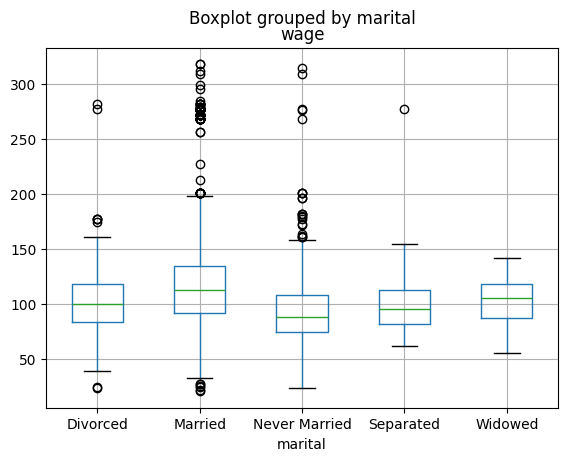

In [84]:
wage.boxplot(column="wage", by="marital")

<Axes: title={'center': 'age'}, xlabel='marital'>

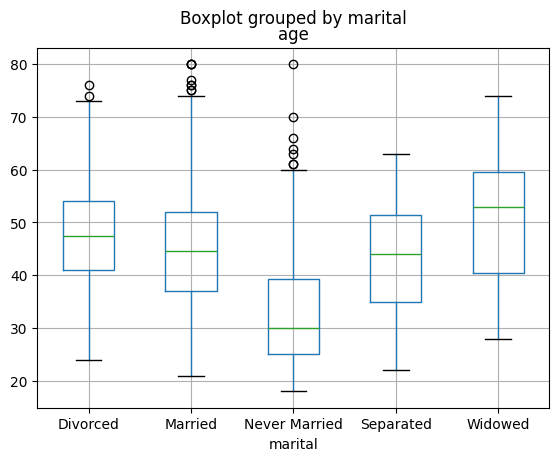

In [85]:
wage.boxplot(column="age", by="marital")

<Axes: xlabel='age', ylabel='wage'>

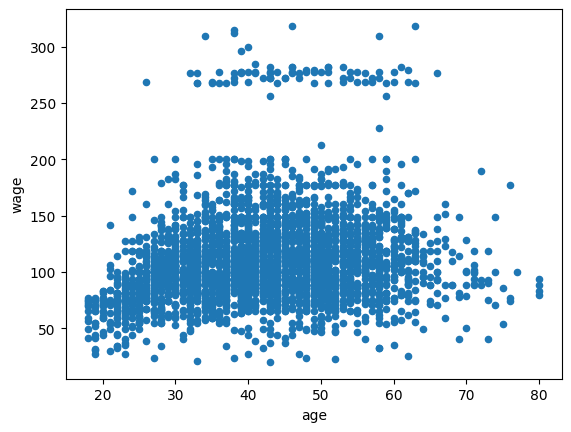

In [88]:
wage.plot.scatter("age", "wage")

In [90]:
wage[wage["marital"] == "Divorced"]["wage"].mean()

,year,age,marital,race,education,jobclass,health,health_ins,logwage,wage
4,2005,50,Divorced,White,HS Grad,Information,<=Good,Yes,4.318063,75.043154
10,2007,45,Divorced,White,Some College,Information,<=Good,Yes,4.763428,117.146817
21,2005,40,Divorced,White,HS Grad,Information,>=Very Good,No,3.920123,50.406661
86,2004,34,Divorced,White,HS Grad,Industrial,>=Very Good,No,4.505150,90.481913
92,2003,33,Divorced,White,< HS Grad,Industrial,<=Good,Yes,4.342423,76.893603
...,...,...,...,...,...,...,...,...,...,...
2918,2003,37,Divorced,White,HS Grad,Information,<=Good,Yes,4.176091,65.110854
2929,2006,47,Divorced,White,HS Grad,Industrial,>=Very Good,Yes,4.602060,99.689464
2945,2004,30,Divorced,White,HS Grad,Industrial,>=Very Good,Yes,4.488551,88.992377
2948,2006,53,Divorced,White,Advanced Degree,Industrial,>=Very Good,Yes,4.929419,138.299127


In [92]:
len(wage[wage["marital"] == "Separated"])

55